# Lendo o conjunto de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_titanic=pd.read_csv('titanic-data-6.csv')

In [3]:
# primeiras linhas
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição das colunas
* <b>Survived:</b> Diz se o passageiro sobreviveu (0 = Não; 1 = Sim)
 
* <b>Pclass:</b> Classe socio-econômica do passageiro (1 = Classe Alta; 2 = Classe Média; 3 = Classe Baixa)
 
* <b>Name:</b> Nome do passageiro
 
* <b>Sex:</b> Sexo do Passageiro
 
* <b>Age:</b> Idade do passageiro
 
* <b>SibSp:</b> Número de irmãos e cônjuges a bordo
 
* <b>Parch:</b> Número de pais e filhos a bordo
 
* <b>Ticket:</b> Número do ticket do passageiro
 
* <b>Fare:</b> Tarifa paga pelo passageiro
 
* <b>Cabin:</b> Número da cabine

* <b>Embarked:</b> Porta de embarcação (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
# dimensões do conjunto
df_titanic.shape

(891, 12)

# Limpeza dos dados

## Verificando se há dados duplicados

In [5]:
df_titanic.duplicated().sum()

0

In [6]:
# Não há dados duplicados

## Analisando nulos

In [7]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Há nulos nas colunas Age, Cabin e Embarked

### Deletando as linhas onde a idade é nula

In [9]:
df_titanic.drop(df_titanic[df_titanic.Age.isnull()].index,inplace=True,axis=0)

## Deletando colunas irrelevantes

In [10]:
df_titanic.drop(['Cabin','Embarked','Ticket','Name'],axis=1,inplace=True)

## Alterando o tipo de dados de idade para int

In [11]:
df_titanic['Age']=df_titanic['Age'].astype(int)

In [12]:
# Novas dimensões do conjunto de dados
df_titanic.shape

(714, 8)

# Questões

## Questão 1 - Qual gênero possui o maior número de sobreviventes?
Nesta seção explorei se a maioria dos sobreviventes foram do sexo feminino ou masculino

In [13]:
# Total de passageiros por gênero
df_titanic.groupby('Sex').Survived.count()

Sex
female    261
male      453
Name: Survived, dtype: int64

In [14]:
# Total de sobreviventes por gênero
survived_by_gender=df_titanic.groupby('Sex').Survived.sum()
survived_by_gender

Sex
female    197
male       93
Name: Survived, dtype: int64

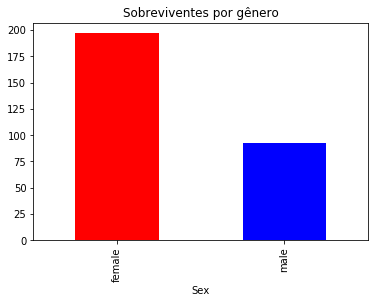

In [15]:
% matplotlib inline
survived_by_gender.plot(kind='bar',color=['red','blue'],title='Sobreviventes por gênero')

### Resposta Questão 1:
Apesar de mais passageiros do sexo masculino terem embarcado, os passageiros do sexo feminino tiveram maior representatividade entre os sobreviventes

## Questão 2 - Qual a faixa etária com maior número de sobreviventes?
Distribuição de sobreviventes por faixa etária

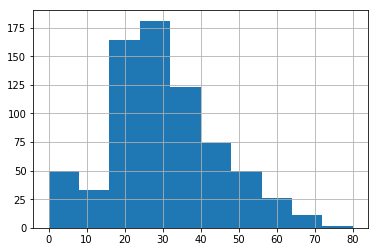

In [59]:
% matplotlib inline
df_titanic.Age.hist()

### Resposta Questão 2: A maior parte dos sobreviventes tem entre 20 e 30 anos

## Questão 3 - Ainda sobre a faixa etária, analise a porcentagem de sobreviventes por faixa etária e compare com o resultado anterior.

In [108]:
# Criando os ranges de idades
ranges=[0,10,20,30,40,50,60,70,80]
range_labels=['Crianças','Adolescentes','Adultos > 20','Adultos > 30','Adultos > 40','Adultos > 50','Idosos > 60', 'Idosos > 70']
df_titanic['Age_Range']=pd.cut(df_titanic['Age'],ranges,labels=range_labels)

In [109]:
df_titanic.groupby('Age_Range').Survived.sum()

Age_Range
Crianças        31
Adolescentes    44
Adultos > 20    84
Adultos > 30    69
Adultos > 40    33
Adultos > 50    17
Idosos > 60      4
Idosos > 70      1
Name: Survived, dtype: int64

In [111]:
# Apesar de a maioria dos sobreviventes terem sido entre 20 e 30 anos, eles representam a maior parte dos passageiros.
# Para entender se crianças tiveram prioridade por exemplo, vamos analisar pela porcentagem de sobreviventes.

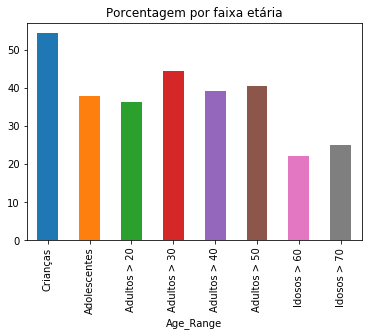

In [113]:
(100 * (df_titanic.query('Survived==1').groupby('Age_Range').PassengerId.count() 
        / df_titanic.groupby('Age_Range').PassengerId.count())).plot(kind='bar',title='Porcentagem por faixa etária')

### Resposta Questão 3 - A maior representatividade percentual de sobreviventes, foi de crianças

## Questão 4 - A maior parte dos sobreviventes foram de classes mais altas?

In [112]:
# A análise será feita através do percentual de sobreviventes, já que as classes possuem diferentes números de passageiros
passageiros_por_classe=df_titanic.groupby('Pclass').count()['PassengerId']

Pclass
1    0.655914
2    0.479769
3    0.239437
dtype: float64


Text(0,0.5,'Soma de sobreviventes')

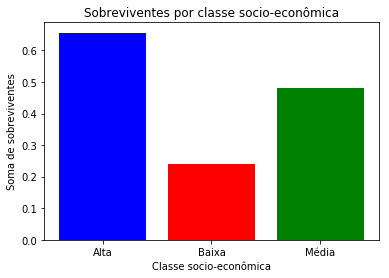

In [114]:
sobreviventes=cont_class=df_titanic.groupby('Pclass').sum()['Survived']
percent_class= sobreviventes / passageiros_por_classe
print(percent_class)
plt.bar(['Alta','Média','Baixa'],percent_class,color=['Blue','Green','Red'])
plt.title('Sobreviventes por classe socio-econômica')
plt.xlabel('Classe socio-econômica')
plt.ylabel('Soma de sobreviventes')

### Resposta Questão 3: 
A análise prova que a classe alta teve o maior número de sobreviventes, no entanto a classe média possui um número ligeiramente menor de sobreviventes

# Conclusão
Apesar de termos uma amostra considerável de passageiros, trabalhamos com alguns dados nulos, portanto essa análise não pôde
ser 100% precisa. No entando, podemos estimar que durante o acidente, foram priorizadas mulheres, crianças e pessoas de classes
mais altas